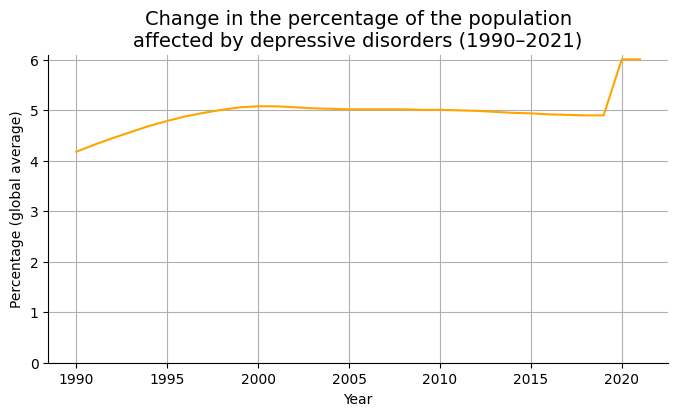

Percentuale di aumento dal 1990 al 2021: 43.78%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#Carica il file CSV
file_path = "Dataset/usa_depression_rate.csv"  
df = pd.read_csv(file_path)

#Filtra gli anni dal 1990 al 2019
df = df[(df["location_name"] == "United States of America")]
df = df[(df["year"] >= 1990) & (df["year"] <= 2021)]

#Definisci le colonne corrispondenti ai problemi mentali
colonne_disturbi = {
    "Depressive disorders": "val",
}

# Converti le colonne percentuali in float
for col in colonne_disturbi.values():
    df[col] = df[col].str.rstrip('%').astype(float) 

#Calcola la media globale per ogni anno
df_media = df.groupby("year")[[col for col in colonne_disturbi.values()]].mean().reset_index()

colori = ["orange"]

# Plot
plt.figure(figsize=(8, 4))
for (nome, col), colore in zip(colonne_disturbi.items(), colori):
    plt.plot(df_media["year"], df_media[col], label=nome, color=colore)

plt.title("Change in the percentage of the population\naffected by depressive disorders (1990–2021)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Percentage (global average)")
plt.ylim(bottom=0)
plt.grid(True)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

val_1990 = df_media.loc[df_media["year"] == 1990, colonne_disturbi["Depressive disorders"]].values[0]
val_2021 = df_media.loc[df_media["year"] == 2021, colonne_disturbi["Depressive disorders"]].values[0]

# Calcola la percentuale di aumento
perc_aumento = ((val_2021 - val_1990) / val_1990) * 100

print(f"Percentuale di aumento dal 1990 al 2021: {perc_aumento:.2f}%")